# Satelitengeodäsie - Übung 3

### Xeno Meienberg



Das Gravitationspotential einer Kugel oder eines Schalensegments lässt sich durch folgende Gleichungen berechnen:

$$ V_{K}^{aussen}(d) = \frac{4 \pi G}{d} \int_{R_i}^{R_{i+1}} r^2 \rho(r) dr$$

wobei hier angenommen wird, dass ein Punkt ausserhalb der Kugel ($R_i = 0$) oder Schalensegments der Dicke $R_i$ bis $R_{i+1}$ mit Abstand  $d$ ist.

Andererseits wirk ein Schalensegment oder eine Kugel, in dem sich ein Punkt befindet ebenfalls ein Gravitationspotential auf einen Punkt aus:

$$ V_{K}^{innen}(d) = 4 \pi G \int_{R_i}^{R_{i+1}} r \rho(r) dr$$

Die Dichte wird modelliert nach dem PREM  (Preliminary Reference Earth Model) und wird im Integral mitberücksichtigt werden müssen. Da für verschiedene Erdschichten auch verschiedene Koeffizienten zum Tragen kommen, müssen diese ebenfalls angepasst werden, je nach Ort des Punktes innerhalb oder ausserhalb der Erdkugel. Die Stammfunktion jedoch mit den jeweiligen Parametern kann allgemein bestimmt werden:

$$ V_{K}^{aussen}(d) = \frac{4 \pi G}{d} \left[B \frac{r^3}{3} + C \frac{r^4}{4R_K} + D \frac{r^5}{5R_K^2} + E \frac{r^6}{6R_K^3} \right]_{r = R_i}^{r = R_{i+1}} $$

$$ V_{K}^{innen}(d) = 4 \pi G \left[ B \frac{r^2}{2} + C \frac{r^3}{3R_K} + D \frac{r^4}{4R_K^2} + E \frac{r^5}{5R_K^3}\right]_{r = R_i}^{r = R_{i+1}}$$

Hierbei ist jedoch genau zu beachten, dass bei den Kugelschalen verschiedene Fälle auftauchen, wo das Gravitationspotential vollständig oder auch teilweise auf den Punkt mit gegebenem Abstand wirken wird. 

![PREM Beispiel](PREM_example.png)

Am obigen Bild sollte erkennbar sein, dass im schwarzen Punkt das innere Gravitationspotential für alle Schichten wirkt, und zwar ab dem Punkt radial gegen aussen mit Laufparameter D. Das äussere Potential wirkt vom Ursprung bis zum Punkt radial nach ausen. Beim roten Punkt ergeben sich Anteile des äusseren Potentials für die innerste Schicht, ein Teil der zweiten Schicht, sowie das innere Potential für alle Schichten ab dem Punkt. Das letzte Beispiel inkludiert den grünen Punkt, welches zeigen sollte, dass hier nur das äussere Potential wirkt, welche sich ermitteln lässt durch die Potentiale aller Schichten.

Somit wäre es durchaus angemessen, im Voraus bereits für alle Kugelsegmente jeweils das innere wie auch das äussere Potential zu berechnen, und dann in innerhalb des jeweiligen Kugelsegmentes, sich gerade der Punkt befindet, inwiefern die relativen Anteile sind vom Segment innerhalb und ausserhalb - sprich für den Fall:

$$ R_i \leq d \leq R_{i+1} $$ 

In diesem Fall müssen die äusseren Potentiale für alle Schalen mit $R \leq d$ und die inneren Potentiale für alle Schalen mit $ d \leq R $ aufsummiert werden, inklusive der jeweiligen Stammfunktionen mit den Grenzen:

$$ V_{K}^{aussen}(d) = \frac{4 \pi G}{d} \left[B \frac{r^3}{3} + C \frac{r^4}{4R_K} + D \frac{r^5}{5R_K^2} + E \frac{r^6}{6R_K^3} \right]_{r = R_i}^{r = d} $$

$$ V_{K}^{innen}(d) = 4 \pi G \left[ B \frac{r^2}{2} + C \frac{r^3}{3R_K} + D \frac{r^4}{4R_K^2} + E \frac{r^5}{5R_K^3}\right]_{r = d}^{r = R_{i+1}}$$

Die Gravitationspotentiale sind additiv, somit läst sich des weiteren das Gesamtpotential bestimmen durch die Summe der inneren und äusseren Potentiale. 


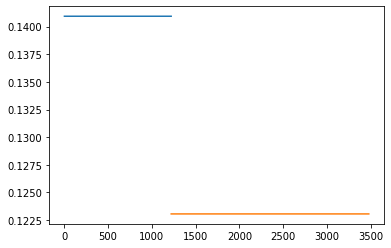

In [39]:
#Calculate Potentials of a point in (d)

import math
import numpy as np
import matplotlib.pyplot as plt

G = 6.67428*10**(-11)
R_k = 6371
prem_constants = [[13.0885,0,-8.8381,0],[12.58515,-1.2638,-3.6424,-5.5281],[7.9565,-6.4761,5.5283,-3.0807],[5.3197, -1.4836,0,0],[11.2494,-8.0298,0,0],[7.1089,-3.0298,0,0],[2.691,0.6924,0,0],[2.691,0.6924,0,0],[2.9,0,0,0],[2.6,0,0,0],[1.02,0,0,0]]
segment = [1221.5,3480,5701,5771,5971,6151,6291,6356,6368,6371]

def which_segment(d):
    for i in segment:
        u=-1
        if d<=i:
            u=u+1
    print(u)

# Calculate inner and outer potentials of "whole" segments 

V_k_inner_1 = 4*math.pi*G*(13.0885*(1221.5**2)/2 - 8.8381*(1221.5**4)/(4*R_k**2))
V_k_inner_2 = 4*math.pi*G*(12.58515*(3480**2-1221.5**2)/2 - 1.2638*(3480**3-1221.5**3)/(3*R_k)-3.6424*(3480**4-1221.5**4)/(4*R_k**3)-5.5281*(3480**5-1221.5**5)/(5*R_k**3))    
V_k_inner_3 = 4*math.pi*G*(7.9565*(5701**2-3480**2)/2 - 6.4761*(5701**3-3480**3)/(3*R_k)+5.5283*(5701**4-3480**4)/(4*R_k**3)-3.0807*(5701**5-3480**5)/(5*R_k**3))  
V_k_inner_4 = 4*math.pi*G*(5.3197*(5771**2-5701**2)/2 - 1.4836*(5771**3-5701**3)/(3*R_k))
V_k_inner_5 = 4*math.pi*G*(11.2494*(5971**2-5771**2)/2 - 8.0298*(5971**3-5771**3)/(3*R_k))
V_k_inner_6 = 4*math.pi*G*(7.1089*(6151**2-5971**2)/2 - 3.0298*(6151**3-5971**3)/(3*R_k))
V_k_inner_7 = 4*math.pi*G*(2.6910*(6291**2-6151**2)/2 + 0.6924*(6291**3-6151**3)/(3*R_k))
V_k_inner_8 = 4*math.pi*G*(2.6910*(6346.6**2-6291**2)/2 + 0.6924*(6356**3-6291**3)/(3*R_k))
V_k_inner_9 = 4*math.pi*G*(2.9*(6356**2-6346.6**2)/2)
V_k_inner_10 = 4*math.pi*G*(2.6*(6368**2-6356**2)/2)
V_k_inner_11 = 4*math.pi*G*(1.02*(6371**2-6368**2)/2)

#here, d is not considered yet
V_k_outer_1_without_d = 4*math.pi*G*(13.0885*(1221.5**3)/3 - 8.8381*(1221.5**5)/(5*R_k**2)) 
V_k_outer_2_without_d = 4*math.pi*G*(12.58515*(3480**3-1221.5**3)/3 - 1.2638*(3480**4-1221.5**4)/(4*R_k)-3.6424*(3480**5-1221.5**5)/(5*R_k**3)-5.5281*(3480**6-1221.5**6)/(6*R_k**3))  


# for d within segment 1:

d = np.arange(1,1221.5,1)
V_1 = np.zeros(len(d))

for i in d:

    for j in range(len(d)):
        
        V_1[j] = V_k_inner_11+V_k_inner_10 + V_k_inner_9 + V_k_inner_8 + V_k_inner_7 + V_k_inner_6 + V_k_inner_6 + V_k_inner_5 + V_k_inner_3 + V_k_inner_2 + 4*math.pi*G*1/i*(13.0885*(i**3)/3 - 8.8381*(i**5)/(5*R_k**2)) + 4*math.pi*G*(13.0885*(1221.5**2-i**2)/2 - 8.8381*(1221.5**4-i**2)/(4*R_k**2)) + 4*math.pi*G*(12.58515*(3480**2-i**2)/2 - 1.2638*(3480**3-i**3)/(3*R_k)-3.6424*(3480**4-i**4)/(4*R_k**3)-5.5281*(3480**5-i**5)/(5*R_k**3))

plt.plot(d,V_1)

#for d within segment 2:

d = np.arange(1221.5,3480,1)
V_2 = np.zeros(len(d))    

for i in d:
    for j in range(len(d)):

        V_2[j] = V_k_inner_11+V_k_inner_10 + V_k_inner_9 + V_k_inner_8 + V_k_inner_7 + V_k_inner_6 + V_k_inner_6 + V_k_inner_5 + V_k_inner_3 + V_k_outer_1_without_d/i + 4*math.pi*G*1/i*(12.58515*(i**3-1221.5**3)/3 - 1.2638*(i**4-1221.5**4)/(4*R_k)-3.6424*(i**5-1221.5**5)/(5*R_k**3)-5.5281*(i**6-1221.5**6)/(6*R_k**3)) + 4*math.pi*G*(12.58515*(i**2-1221.5**2)/2 - 1.2638*(i**3-1221.5**3)/(3*R_k)-3.6424*(i**4-1221.5**4)/(4*R_k**3)-5.5281*(i**5-1221.5**5)/(5*R_k**3))

plt.plot(d,V_2)        

## Berechnung der Erdbeschleunigung

Die Berechnung der Erdbeschleunigung erfolgt durch den Gradienten des Gravitationspotentials. Da die Gravitationspotentiale addiert werden können, lässt sich der Gradient, welcher in $r$ durch die Ableitung in $r$ einfach bestimmt werden kann. Die Ableitung ergibt:

$$ a = \nabla V = \frac{d}{dr} V(d) =  $$
